usage: ipykernel_launcher.py [-h] [--graph GRAPH] [--y Y]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1010/jupyter/kernel-14c9cd52-2eb8-490e-aa5e-4e701886c90c.json


SystemExit: 2

/home/ziyinl/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


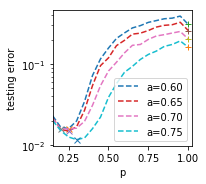

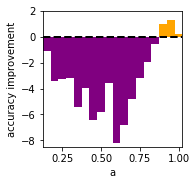

In [257]:
import os
import sys
import json
import numpy as np
import argparse
import matplotlib.pyplot as plt

def get_data(p, a):
    file_name = "mnist_symmetric_{:.2f}_{:.2f}_1000.0_1.json".format(p, 1 - a)
    data = json.load(open("{}/{}".format(data_dir, file_name), 'r'))
    return data

data_dir = "../results/grid_search"
plot_dir = "plots"
p_grid = [0.05 * i for i in range(3, 21)]

parser = argparse.ArgumentParser(
        description='Grid Search Runner')

parser.add_argument(
        '--graph', type=str, help='[grid]', default="grid")

parser.add_argument(
        '--y', type=str, help='[train_loss, test_acc, test_loss]', default="test_acc")


args = parser.parse_args(args=[])
accs_list = []
if (args.graph == "grid"):
    epoch = 100

    plt.figure(figsize=(2.5,2.5))
    for a in [0.05 * i for i in range(3, 21)]:
        accs = []
        for p in p_grid:
            data = get_data(p, a)
            accs.append(data[args.y][epoch - 1])
        accs = np.array(accs)    
        accs_list.append(accs)
        if a>0.55 and a < 0.80:
            error = (1 - accs / 100)
            plt.plot(p_grid, 1 - accs / 100, label="a={:.2f}".format(a), linestyle='--')
            plt.plot(p_grid[error.argmin()], (1 - accs / 100).min(), lw=0, marker='x')
            plt.plot(p_grid[-1], (1 - accs / 100)[-1], lw=0, marker='+')


        #plt.xscale('log')
        plt.yscale('log')
        plt.xlim(0.15, 1.025)
        
    plt.legend()
    plt.ylabel('testing error')
    plt.xlabel('p')
    plt.savefig('{}/grid_search/testing_error_two_minima.png'.format(plot_dir, args.graph, args.y), bbox_inches='tight', dpi=150)

    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.xlabel("p", fontsize=12)
    #plt.ylabel("{}".format(args.y), fontsize=12)
    #plt.savefig('{}/grid_search/{}_{}.png'.format(plot_dir, args.graph, args.y), bbox_inches='tight')
    #plt.show()
    #plt.clf()

plt.figure(figsize=(2.5,2.5))
accs_list = np.array(accs_list)
plt.axhline(0, color='black', lw=2, linestyle="--")
diff = accs_list[:, -2]-accs_list[:, -1]

m = plt.bar(np.array(p_grid)[diff>0], diff[diff>0], width=0.05, color='orange')
m = plt.bar(np.array(p_grid)[diff<0], diff[diff<0], width=0.05, color='purple')
plt.ylabel('accuracy improvement')
plt.xlabel('a')
plt.ylim(-8.5, 2)
plt.xlim(0.125,1.025)

plt.savefig('{}/grid_search/improvement-mnist.png'.format(plot_dir, args.graph, args.y), bbox_inches='tight', dpi=150)


    
if (args.graph == "fixed_a"):
    a = 0.2
    for p in p_grid:
        data = get_data(p, a)[args.y]
        plt.plot(np.arange(0, len(data), 1), data, label="p={:.2f}".format(p))
    plt.legend()
    plt.xlabel("epochs", fontsize=12)
    plt.ylabel("{}".format(args.y), fontsize=12)
    plt.savefig('{}/grid_search/{}_{}_{}.png'.format(plot_dir, args.graph, args.y, a))

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.  ] 19 19 18
[0.08611111 0.084      0.08211111 0.08044444 0.079      0.07777778
 0.07677778 0.076      0.07544444 0.07511111 0.075      0.07511111
 0.07544444 0.076      0.07677778 0.07777778 0.079      0.08044444
 0.08211111 0.084      0.08611111 0.08844444 0.091      0.09377778
 0.09677778 0.1        0.10344444 0.10711111 0.111      0.11511111
 0.11944444 0.124      0.12877778 0.13377778 0.139      0.14444444
 0.15011111 0.156      0.16211111 0.16844444 0.175      0.18177778
 0.18877778 0.196      0.20344444 0.21111111 0.219      0.22711111
 0.23544444 0.244      0.25277778 0.26177778 0.271      0.28044444
 0.29011111 0.3        0.31011111 0.32044444 0.331      0.34177778
 0.35277778 0.364      0.37544444 0.38711111 0.399      0.41111111
 0.42344444 0.436      0.44877778 0.46177778 0.475      0.48844444
 0.50211111 0.516      0.53011111 0.54444444 0.559      0.57377778
 0.58877778 0.604     

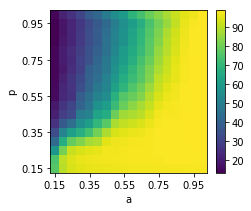

[[76.5  74.82 58.56 42.66 32.85 25.45 20.75 18.94 15.67 15.19 14.99 14.65
  14.62 14.5  13.35 13.46 13.45 14.54]
 [90.19 90.63 81.32 66.57 52.04 37.42 28.84 26.52 22.88 22.74 21.36 19.04
  20.24 19.83 18.74 17.77 18.25 21.68]
 [94.1  94.89 91.95 78.86 61.66 44.57 32.55 31.06 26.09 26.24 26.71 24.6
  23.58 24.1  22.52 22.49 22.41 25.64]
 [95.47 96.52 94.05 83.12 67.38 56.31 49.05 40.6  38.85 34.15 32.43 29.85
  30.2  29.4  28.4  27.86 27.28 30.48]
 [96.18 97.11 95.58 87.6  73.33 60.73 51.6  46.87 44.51 40.65 39.62 39.43
  35.   34.52 33.82 33.67 32.54 37.93]
 [96.63 97.48 96.11 89.21 80.89 69.82 63.11 56.71 51.79 47.79 44.2  42.73
  41.71 39.87 38.04 38.31 37.3  41.27]
 [96.91 97.76 97.74 95.45 88.68 77.09 66.18 60.73 55.29 52.51 51.5  48.53
  47.74 45.86 45.37 44.05 42.51 48.94]
 [97.   97.73 97.61 97.01 94.13 88.56 80.12 71.69 67.78 62.16 58.95 56.39
  55.53 53.09 51.66 51.03 49.37 55.17]
 [97.35 98.21 98.13 97.65 95.3  91.38 86.94 79.69 76.16 69.31 66.49 63.97
  60.85 60.61 57.11 57.

In [110]:
import os
import sys
import json
import numpy as np
import argparse
import matplotlib.pyplot as plt

def get_data(p, a):
    file_name = "mnist_symmetric_{:.2f}_{:.2f}_1000.0_1.json".format(p, 1 - a)
    data = json.load(open("{}/{}".format(data_dir, file_name), 'r'))
    return data

data_dir = "../results/grid_search"
plot_dir = "plots"
p_grid = [0.05 * i for i in range(3, 21)]

parser = argparse.ArgumentParser(
        description='Grid Search Runner')

parser.add_argument(
        '--graph', type=str, help='[grid]', default="grid")

parser.add_argument(
        '--y', type=str, help='[train_loss, test_acc, test_loss]', default="test_acc")

args = parser.parse_args(args=[])
if (args.graph == "grid"):
    epoch = 100

    accs_list = []
    maxes = []
    for a in [0.05 * i for i in range(3, 21)]:
        accs = []
        for p in p_grid:
            data = get_data(p, a)
            accs.append(data[args.y][epoch - 1])
        accs = np.array(accs)
        #accs = accs - accs.min() 
        #accs = accs / accs.max()
        maxes.append(accs.argmax())
        accs_list.append(accs)
        #plt.plot(p_grid, accs, label="a={:.2f}".format(a))
    accs_list = np.array(accs_list) 
    
    
    a_grid = np.arange(2,21) / 20
    #print(a_grid)
    plt.figure(figsize=(3.5,3))
    myplot = plt.pcolormesh(a_grid, a_grid, (accs_list).transpose(), cmap='viridis')
    plt.xticks(a_grid[::4] + 0.025,a_grid[1::4])
    plt.yticks(a_grid[::4]+ 0.025,a_grid[1::4])

    a = a_grid
    print(a, len(a), len(a_grid),len(accs_list))
    #a = np.arange(3,21) / 20
    #print(a, a_grid)
    a = np.arange(101)/100

    pbeta = (1 - 2*a + 10* a**2)/ (10 - 1) -0.025
    print(pbeta)
    
    
    
    #plt.plot(a, a, lw=2, color='yellow', linestyle=':', label =r'$\alpha$')
    #plt.plot(xvalues, lw=2, color='blue', linestyle=':')
    
    #plt.plot(a, pbeta, lw=2, color='blue', linestyle='--', label =r'$\beta$')
    
    x = np.arange(0,101)/100

    gamma10 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.505103, 0.558794, 0.599539, \
    0.63308, 0.661785, 0.686925, 0.709285, 0.729395, 0.747634, 0.764288, \
    0.779576, 0.793674, 0.806725, 0.818845, 0.830134, 0.840675, 0.85054, \
    0.85979, 0.86848, 0.876657, 0.884362, 0.891632, 0.898501, 0.904998, \
    0.911149, 0.916978, 0.922507, 0.927755, 0.93274, 0.937478, 0.941983, \
    0.94627, 0.95035, 0.954235, 0.957935, 0.96146, 0.964818, 0.968017, \
    0.971064, 0.973966, 0.976729, 0.979358, 0.981858, 0.984233, 0.986487, \
    0.988621, 0.990637, 0.992537, 0.994318, 0.995976, 0.997502, 0.998875, \
    0.9999]
    #plt.plot(x, gamma10, lw=2, color='orange', label =r'$\gamma$')
    #plt.plot(a_grid[:-1]+ 0.025, a_grid[maxes] + 0.025 , lw=0,marker='+')


    pp = plt.colorbar(myplot, orientation="vertical")
    
    plt.ylabel('p')
    plt.xlabel('a')
    plt.ylim(0.10, 1)
    plt.xlim(0.10, 1)
    #plt.legend()
    plt.savefig('{}/grid_search/raw_performance_mnist.png'.format(plot_dir), dpi=150, bbox_inches='tight')

    plt.show()
    
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.xlabel("p", fontsize=12)
    #plt.ylabel("{}".format(args.y), fontsize=12)
    
    #plt.show()
    #plt.clf()

print(accs_list)
if (args.graph == "fixed_a"):
    a = 0.2
    for p in p_grid:
        data = get_data(p, a)[args.y]
        plt.plot(np.arange(0, len(data), 1), data, label="p={:.2f}".format(p))
    plt.legend()
    plt.xlabel("epochs", fontsize=12)
    plt.ylabel("{}".format(args.y), fontsize=12)
    plt.savefig('{}/grid_search/{}_{}_{}.png'.format(plot_dir, args.graph, args.y, a))

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.  ] 19 19 18
[0.08611111 0.084      0.08211111 0.08044444 0.079      0.07777778
 0.07677778 0.076      0.07544444 0.07511111 0.075      0.07511111
 0.07544444 0.076      0.07677778 0.07777778 0.079      0.08044444
 0.08211111 0.084      0.08611111 0.08844444 0.091      0.09377778
 0.09677778 0.1        0.10344444 0.10711111 0.111      0.11511111
 0.11944444 0.124      0.12877778 0.13377778 0.139      0.14444444
 0.15011111 0.156      0.16211111 0.16844444 0.175      0.18177778
 0.18877778 0.196      0.20344444 0.21111111 0.219      0.22711111
 0.23544444 0.244      0.25277778 0.26177778 0.271      0.28044444
 0.29011111 0.3        0.31011111 0.32044444 0.331      0.34177778
 0.35277778 0.364      0.37544444 0.38711111 0.399      0.41111111
 0.42344444 0.436      0.44877778 0.46177778 0.475      0.48844444
 0.50211111 0.516      0.53011111 0.54444444 0.559      0.57377778
 0.58877778 0.604     

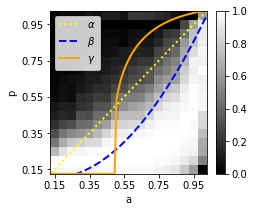

[[1.         0.97339667 0.71591449 0.46413302 0.3087886  0.19160728
  0.11718131 0.0885194  0.03673793 0.02913698 0.02596991 0.02058591
  0.02011085 0.01821061 0.         0.00174188 0.00158353 0.01884402]
 [0.99396102 1.         0.8722207  0.66977766 0.4703541  0.26969531
  0.15193522 0.12009333 0.0701345  0.06821301 0.04927258 0.01743069
  0.03390063 0.0282734  0.0133132  0.         0.00658798 0.05366456]
 [0.98910044 1.         0.95943709 0.77883554 0.5415287  0.30573951
  0.13990066 0.11934327 0.05077263 0.05284216 0.05932671 0.03021523
  0.01614238 0.02331678 0.00151766 0.00110375 0.         0.04456402]
 [0.98483536 1.         0.96432698 0.80647025 0.579145   0.41926632
  0.31441363 0.19237435 0.16709994 0.0992201  0.07437897 0.03711727
  0.04217215 0.03061814 0.01617562 0.00837666 0.         0.04621606]
 [0.98559703 1.         0.97630479 0.85271798 0.63171752 0.43658046
  0.29518352 0.22192969 0.18538021 0.12560012 0.10964844 0.1067059
  0.03809819 0.0306644  0.01982345 0.01750039

In [113]:
import os
import sys
import json
import numpy as np
import argparse
import matplotlib.pyplot as plt

def get_data(p, a):
    file_name = "mnist_symmetric_{:.2f}_{:.2f}_1000.0_1.json".format(p, 1 - a)
    data = json.load(open("{}/{}".format(data_dir, file_name), 'r'))
    return data

data_dir = "../results/grid_search"
plot_dir = "plots"
p_grid = [0.05 * i for i in range(3, 21)]

parser = argparse.ArgumentParser(
        description='Grid Search Runner')

parser.add_argument(
        '--graph', type=str, help='[grid]', default="grid")

parser.add_argument(
        '--y', type=str, help='[train_loss, test_acc, test_loss]', default="test_acc")

args = parser.parse_args(args=[])
if (args.graph == "grid"):
    epoch = 100

    accs_list = []
    maxes = []
    for a in [0.05 * i for i in range(3, 21)]:
        accs = []
        for p in p_grid:
            data = get_data(p, a)
            accs.append(data[args.y][epoch - 1])
        accs = np.array(accs)
        accs = accs - accs.min() 
        accs = accs / accs.max()
        maxes.append(accs.argmax())
        accs_list.append(accs)
        #plt.plot(p_grid, accs, label="a={:.2f}".format(a))
    accs_list = np.array(accs_list) 
    
    
    a_grid = np.arange(2,21) / 20
    #print(a_grid)
    plt.figure(figsize=(3.5,3))
    myplot = plt.pcolormesh(a_grid, a_grid, (accs_list).transpose(), cmap='gray')
    plt.xticks(a_grid[::4] + 0.025,a_grid[1::4])
    plt.yticks(a_grid[::4]+ 0.025,a_grid[1::4])

    a = a_grid
    print(a, len(a), len(a_grid),len(accs_list))
    #a = np.arange(3,21) / 20
    #print(a, a_grid)
    a = np.arange(101)/100

    pbeta = (1 - 2*a + 10* a**2)/ (10 - 1) -0.025
    print(pbeta)
    
    
    
    plt.plot(a, a, lw=2, color='yellow', linestyle=':', label =r'$\alpha$')
    #plt.plot(xvalues, lw=2, color='blue', linestyle=':')
    
    plt.plot(a, pbeta, lw=2, color='blue', linestyle='--', label =r'$\beta$')
    
    x = np.arange(0,101)/100

    gamma10 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.505103, 0.558794, 0.599539, \
    0.63308, 0.661785, 0.686925, 0.709285, 0.729395, 0.747634, 0.764288, \
    0.779576, 0.793674, 0.806725, 0.818845, 0.830134, 0.840675, 0.85054, \
    0.85979, 0.86848, 0.876657, 0.884362, 0.891632, 0.898501, 0.904998, \
    0.911149, 0.916978, 0.922507, 0.927755, 0.93274, 0.937478, 0.941983, \
    0.94627, 0.95035, 0.954235, 0.957935, 0.96146, 0.964818, 0.968017, \
    0.971064, 0.973966, 0.976729, 0.979358, 0.981858, 0.984233, 0.986487, \
    0.988621, 0.990637, 0.992537, 0.994318, 0.995976, 0.997502, 0.998875, \
    0.9999]
    plt.plot(x, gamma10, lw=2, color='orange', label =r'$\gamma$')
    #plt.plot(a_grid[:-1]+ 0.025, a_grid[maxes] + 0.025 , lw=0,marker='+')


    pp = plt.colorbar(myplot, orientation="vertical")

    plt.ylabel('p')
    plt.xlabel('a')
    plt.ylim(0.10, 1)
    plt.xlim(0.10, 1)
    plt.legend()
    plt.savefig('{}/grid_search/relative_performance_mnist.png'.format(plot_dir), dpi=150, bbox_inches='tight')

    plt.show()
    
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.xlabel("p", fontsize=12)
    #plt.ylabel("{}".format(args.y), fontsize=12)
    
    #plt.show()
    #plt.clf()

print(accs_list)
if (args.graph == "fixed_a"):
    a = 0.2
    for p in p_grid:
        data = get_data(p, a)[args.y]
        plt.plot(np.arange(0, len(data), 1), data, label="p={:.2f}".format(p))
    plt.legend()
    plt.xlabel("epochs", fontsize=12)
    plt.ylabel("{}".format(args.y), fontsize=12)
    plt.savefig('{}/grid_search/{}_{}_{}.png'.format(plot_dir, args.graph, args.y, a))

/home/ziyinl/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.  ] 19 19 18
[0.08611111 0.084      0.08211111 0.08044444 0.079      0.07777778
 0.07677778 0.076      0.07544444 0.07511111 0.075      0.07511111
 0.07544444 0.076      0.07677778 0.07777778 0.079      0.08044444
 0.08211111 0.084      0.08611111 0.08844444 0.091      0.09377778
 0.09677778 0.1        0.10344444 0.10711111 0.111      0.11511111
 0.11944444 0.124      0.12877778 0.13377778 0.139      0.14444444
 0.15011111 0.156      0.16211111 0.16844444 0.175      0.18177778
 0.18877778 0.196      0.20344444 0.21111111 0.219      0.22711111
 0.23544444 0.244      0.25277778 0.26177778 0.271      0.28044444
 0.29011111 0.3        0.31011111 0.32044444 0.331      0.34177778
 0.35277778 0.364      0.37544444 0.38711111 0.399      0.41111111
 0.42344444 0.436      0.44877778 0.46177778 0.475      0.48844444
 0.50211111 0.516      0.53011111 0.54444444 0.559      0.57377778
 0.58877778 0.604     

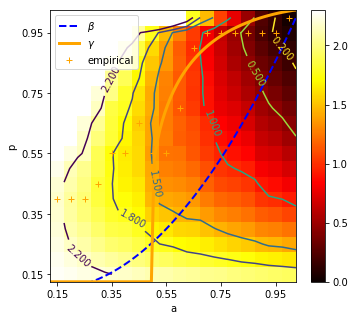

[[ 2.28019576  2.25590291  2.23083878  2.20861418  2.18690091  2.17661631
   2.19484036  2.24811552  2.39894701  2.50221378  2.6126267   2.73059307
   2.86425999  3.0280099   3.29614213  3.59705901  4.24569635 12.47245634]
 [ 2.25950213  2.21063025  2.16077865  2.11132328  2.07582375  2.07327147
   2.10563617  2.13044745  2.22486378  2.29516061  2.38357675  2.53090394
   2.61816659  2.77602154  3.00886979  3.33464648  3.81152231  9.50866564]
 [ 2.23606666  2.16577959  2.0965975   2.04108249  1.99150925  1.98187453
   2.01090407  2.03418157  2.14622738  2.1607617   2.20305262  2.31768613
   2.44914921  2.54296962  2.71397879  2.97051279  3.43204929  8.55056193]
 [ 2.21275412  2.11609713  2.02300957  1.95460827  1.90350051  1.85543676
   1.84282854  1.89476644  1.89701853  1.98970081  2.0538508   2.15372775
   2.20141259  2.32648119  2.43013307  2.67680846  3.0945431   7.57196827]
 [ 2.18737268  2.07127594  1.96524046  1.87494437  1.80722608  1.76350381
   1.7634163   1.7468652   1.73073

In [169]:
import os
import sys
import json
import numpy as np
import argparse
import matplotlib.pyplot as plt

def get_data(p, a):
    file_name = "mnist_symmetric_{:.2f}_{:.2f}_1000.0_1.json".format(p, 1 - a)
    data = json.load(open("{}/{}".format(data_dir, file_name), 'r'))
    return data

data_dir = "../results/grid_search"
plot_dir = "plots"
p_grid = [0.05 * i for i in range(3, 21)]

parser = argparse.ArgumentParser(
        description='Grid Search Runner')

parser.add_argument(
        '--graph', type=str, help='[grid]', default="grid")

parser.add_argument(
        '--y', type=str, help='[train_loss, test_acc, test_loss]', default="test_loss")

args = parser.parse_args(args=[])
if (args.graph == "grid"):
    epoch = 100

    accs_list = []
    maxes = []
    for a in [0.05 * i for i in range(3, 21)]:
        accs = []
        for p in p_grid:
            data = get_data(p, a)
            accs.append(data[args.y][epoch - 1])
        accs = np.array(accs)
        #accs = accs - accs.min() 
        #accs = accs / accs.max()
        maxes.append(accs.argmin())
        accs_list.append(accs)
        #plt.plot(p_grid, accs, label="a={:.2f}".format(a))
    accs_list = np.array(accs_list) 
    
    
    a_grid = np.arange(2,21) / 20
    #print(a_grid)
    plt.figure(figsize=(5.5,5))
    myplot = plt.pcolormesh(a_grid, a_grid, (accs_list).transpose(), cmap='hot', vmax=2.3, vmin=0)
    a_grid2 = np.arange(3,21) / 20 

    myplot2 =plt.contour(a_grid2, a_grid2 - 0.025, (accs_list).transpose(),
                         [0.2, 0.5, 1, 1.5, 1.8, 2.2], lw=3, cmap='viridis_r')

    plt.clabel(myplot2, inline=1, fontsize=10)
    
    plt.xticks(a_grid[::4] + 0.025,a_grid[1::4])
    plt.yticks(a_grid[::4]+ 0.025,a_grid[1::4])

    a = a_grid
    print(a, len(a), len(a_grid),len(accs_list))
    #a = np.arange(3,21) / 20
    #print(a, a_grid)
    a = np.arange(101)/100

    pbeta = (1 - 2*a + 10* a**2)/ (10 - 1) -0.025
    print(pbeta)
    
    
    
    #plt.plot(a, a, lw=2, color='yellow', linestyle=':', label =r'$\alpha$')
    #plt.plot(xvalues, lw=2, color='blue', linestyle=':')
    
    plt.plot(a, pbeta, lw=2, color='blue', linestyle='--', label =r'$\beta$')
    
    #plt.plot(x, gamma10, lw=2, color='orange', label =r'$\gamma$')

    pp = plt.colorbar(myplot, orientation="vertical")
    
    
    x = np.arange(0,101)/100

    gamma10 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, \
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.505103, 0.558794, 0.599539, \
    0.63308, 0.661785, 0.686925, 0.709285, 0.729395, 0.747634, 0.764288, \
    0.779576, 0.793674, 0.806725, 0.818845, 0.830134, 0.840675, 0.85054, \
    0.85979, 0.86848, 0.876657, 0.884362, 0.891632, 0.898501, 0.904998, \
    0.911149, 0.916978, 0.922507, 0.927755, 0.93274, 0.937478, 0.941983, \
    0.94627, 0.95035, 0.954235, 0.957935, 0.96146, 0.964818, 0.968017, \
    0.971064, 0.973966, 0.976729, 0.979358, 0.981858, 0.984233, 0.986487, \
    0.988621, 0.990637, 0.992537, 0.994318, 0.995976, 0.997502, 0.998875, \
    0.9999]
    plt.plot(x, gamma10, lw=3, color='orange', label =r'$\gamma$')
    plt.plot(a_grid[:-1]+ 0.025, a_grid[maxes] + 0.025 , lw=0,marker='+', color='orange', label='empirical')

    
    
    plt.ylabel('p')
    plt.xlabel('a')
    plt.ylim(0.10, 1)
    plt.xlim(0.10, 1)
    plt.legend()
    plt.savefig('{}/grid_search/test_loss_mnist.png'.format(plot_dir), dpi=150, bbox_inches='tight')

    plt.show()
    
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.xlabel("p", fontsize=12)
    #plt.ylabel("{}".format(args.y), fontsize=12)
    
    #plt.show()
    #plt.clf()

print(accs_list)
if (args.graph == "fixed_a"):
    a = 0.2
    for p in p_grid:
        data = get_data(p, a)[args.y]
        plt.plot(np.arange(0, len(data), 1), data, label="p={:.2f}".format(p))
    plt.legend()
    plt.xlabel("epochs", fontsize=12)
    plt.ylabel("{}".format(args.y), fontsize=12)
    plt.savefig('{}/grid_search/{}_{}_{}.png'.format(plot_dir, args.graph, args.y, a))